### Prodigy InfoTech Task-2

<img src = Task-2.png>

#

### Problem Statement

The Titanic dataset, a classic machine learning problem, presents a compelling challenge. The goal is to predict whether a passenger survived the Titanic disaster based on various factors like age, sex, class, and ticket fare. By analyzing the dataset , we aim to understand the key factors influencing survival and gain insights into the historical event.

### Objectives

1. **Data Cleaning and Preparation**:

- Handle missing values and inconsistencies in the data.
- Convert categorical variables into numerical format for model training.
- Explore and visualize the distribution of key variables.

2. **Exploratory Data Analysis (EDA)**:

- Analyze the relationship between different variables and their impact on survival.
- Identify patterns and trends in the data, such as the survival rates of different passenger groups.
- Visualize the data using appropriate plots and charts to gain insights.




### Methodology

1. **Data Loading and Exploration**:

- Load the Titanic dataset into a suitable data analysis tool (e.g., Python with Pandas and NumPy).
- Explore the data structure, variable types, and missing values.

2. **Data Cleaning and Preprocessing**:

- Handle missing values using appropriate techniques (e.g., imputation or removal).
- Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.
- Normalize or standardize numerical features as needed.   

3. **Exploratory Data Analysis (EDA)**:

- Visualize the distribution of key variables (e.g., age, fare, class) using histograms and box plots.
- Analyze the relationship between categorical variables and survival using bar charts and contingency tables.
- Explore the correlation between numerical variables using scatter plots and correlation matrices.

4. **Feature Engineering**:

- Create new features from existing ones, such as family size or title from the "Name" column.
- Consider feature selection techniques to identify the most relevant features.




### Expected Outcomes

- A clean and preprocessed dataset ready for analysis.
- In-depth insights into the factors influencing survival on the Titanic.
- A comprehensive report documenting the data analysis, and findings.



#

#

#

## Exploratory Data Analysis

### Importing required libraries

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings

warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression  # For Logistic Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


### Loading and viewing the dataset

In [43]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Dictionary

| Variable   | Definition                                | Key                                       |
|------------|-------------------------------------------|-------------------------------------------|
| survival   | Survival                                  | 0 = No, 1 = Yes                          |
| pclass     | Ticket class                              | 1 = 1st, 2 = 2nd, 3 = 3rd                |
| sex        | Sex                                       |                                           |
| age        | Age in years                              |                                           |
| sibsp      | # of siblings / spouses aboard the Titanic |                                           |
| parch      | # of parents / children aboard the Titanic |                                           |
| ticket     | Ticket number                             |                                           |
| fare       | Passenger fare                            |                                           |
| cabin      | Cabin number                              |                                           |
| embarked   | Port of Embarkation                       | C = Cherbourg, Q = Queenstown, S = Southampton |


**Variable Notes**

1- pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

2- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

3- sibsp: The dataset defines family relations in this way...

4- Sibling = brother, sister, stepbrother, stepsister

5- Spouse = husband, wife (mistresses and fiancés were ignored)

6- parch: The dataset defines family relations in this way...

7- Parent = mother, father

8- Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



#

In [45]:
#Checking the shape 
df.shape

(891, 12)

In [46]:
# Checking for nulls percentage

missing_data = (df.isna().sum() / df.shape[0]) * 100
missing_data 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

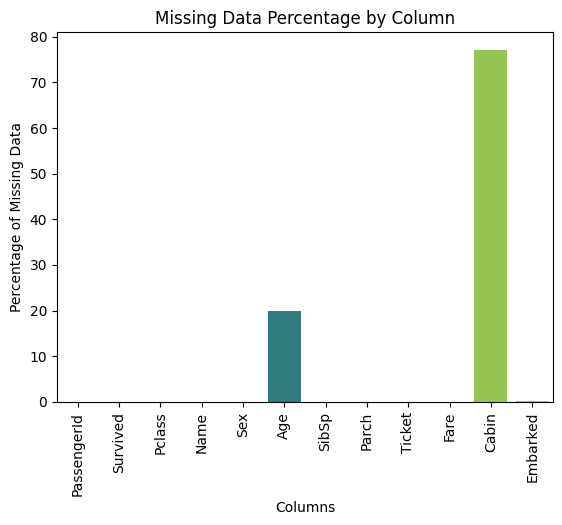

In [47]:

# Create a bar plot

sns.barplot(x=missing_data.index, y=missing_data.values,palette='viridis', orient='v')
# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Data')
plt.title('Missing Data Percentage by Column')

# Show the plot
plt.xticks(rotation=90)  
plt.show()


### Observation

- Age has approx 19% null values.
- Cabin has almost 78% null values

In [48]:
# lets check for duplicates

df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Observation

- There are no duplicates in the dataset

#

### Data handling and Pre-Processing 

In [49]:
# dropping the Cabin column as it has too much nulls to be imputed for 

df.drop('Cabin',axis=1,inplace=True)

In [50]:
# Embarked column has only 0.22% nulls we can impute them ... since it has  string values we will go with mode ,  i.e most frequently occuring value.

mode_value_embarked = df.Embarked.mode()
mode_value_embarked 

0    S
Name: Embarked, dtype: object

In [51]:
# lets impute
df.Embarked.fillna( mode_value_embarked.iloc[0] , inplace=True)


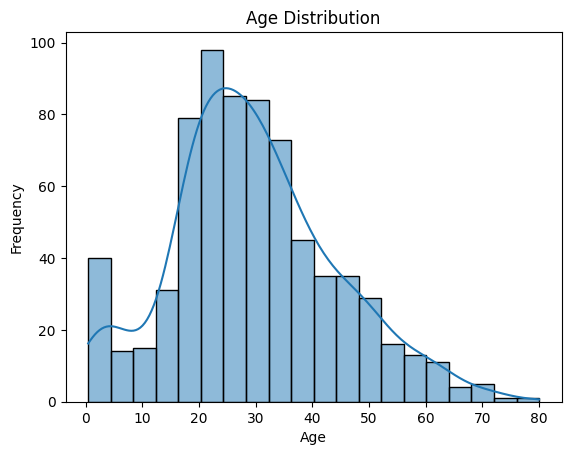

In [52]:
# Lets handle the age column now which has 20%(approx nulls)

# Plot histogram to check age distribution
sns.histplot(df['Age'], bins=20, kde=True, palette='viridis')  # kde adds a density curve
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


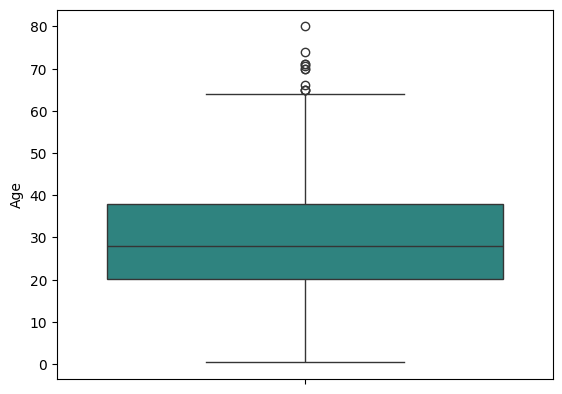

In [53]:
# lets plot a box plot to check for outliers age

sns.boxplot(df['Age'] , palette='viridis') 
plt.show()

### Observations

- **Age Distribution**: The histogram and boxplot both confirm that the age distribution is positively skewed, with a concentration of younger individuals and a few older outliers.

- **Central Tendency**: The mode is likely around 20-25 years old, the median is around 30 years old, and the mean is likely higher than both due to the positive skew.

- **Spread**: The data spans a wide range of ages, from 0 to 80 years old.

- **Outliers**: The boxplot clearly identifies several outliers in the older age range.

Overall, the data suggests a population with a relatively young demographic, with a peak around 20-25 years old and a few older individuals who might be atypical.

#

In [54]:
# lets go ahead and use median age and impute it

median_age = df['Age'].median()

df.Age = df.Age.fillna(median_age) 

In [55]:
#Lets Check nulls now

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Feature Engineering

In [56]:
# lets take a look at Name column
df.Name.head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

**The format of Name column is Last Name, Title. First Name (Maiden Name) , lets extract these and add it to dataframes as columns**

In [57]:
# the name column has data that we can use and extract and make usefull new features

df["last_name"] = df.Name.apply(lambda x : x.split(', ')[0])
df["first_name"] = df.Name.apply(lambda x : x.split(', ')[1])
df['first_name'] = df.first_name.apply(lambda x : x.split(' (')[0])

In [58]:
# we can create a column travel_with_family if the person is with family

def is_with_family(row):
    if row['SibSp'] > 0 or row['Parch'] > 0:
        return 1  # With family
    else:
        return 0  # Traveling alone

df['travel_with_family'] = df.apply(is_with_family, axis=1)

In [59]:
# lets extract the title from first name 

df['title'] = df['first_name'].apply(lambda x : x.split('. ')[0])

In [60]:
# lets check the titles
df['title'].value_counts()

title
Mr              517
Miss            181
Mrs             111
Master           40
Mrs.             14
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
the Countess      1
Capt              1
Ms                1
Miss.             1
Lady.             1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [61]:
# fixing the title column 

df['title'] = df['title'].str.replace('Miss.' , 'Miss')
df['title'] = df['title'].str.replace('Mrs.' , 'Mrs')
df['title'] = df['title'].str.replace('Ms.' , 'Miss')
df['title'] = df['title'].str.replace('Miss.' , 'Miss')
df['title'] = df['title'].str.replace('Ms' , 'Miss')
df['title'] = df['title'].str.replace('Miss.' , 'Miss')


In [62]:
def categorize_titles(title):
  if title in ['Mr', 'Mrs', 'Miss', 'Master']:
      return title
  else:
      return 'Other'

df['title'] = df['title'].apply(categorize_titles)

In [63]:
# lets check the titles
df['title'].value_counts()

title
Mr        517
Miss      183
Mrs       125
Master     40
Other      26
Name: count, dtype: int64

### Dropping columns which we think are of no use for us..
 

In [64]:
# lets drop the name, first_name, last_name as our work with it is over..


df.drop(['PassengerId' , "Ticket" , 'Name' , "first_name" , 'last_name'] , axis=1,inplace=True)

In [65]:
# converting age to int data = type

df['Age'] = df['Age'].astype('int')

In [66]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,travel_with_family,title
0,0,3,male,22,1,0,7.2500,S,1,Mr
1,1,1,female,38,1,0,71.2833,C,1,Mrs
2,1,3,female,26,0,0,7.9250,S,0,Miss
3,1,1,female,35,1,0,53.1000,S,1,Mrs
4,0,3,male,35,0,0,8.0500,S,0,Mr


#

###  Visualizing and analying relationships

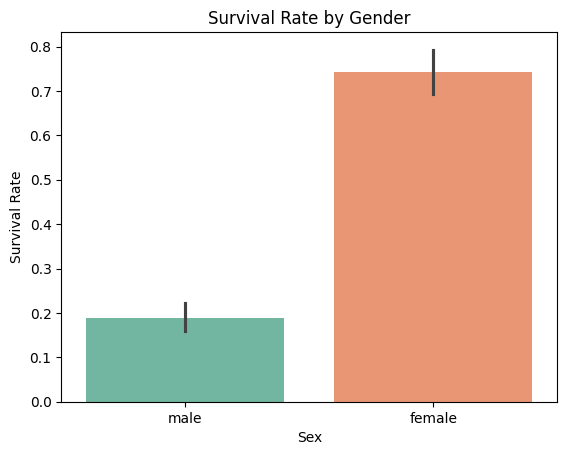

In [67]:
#Survival rate by gender

sns.barplot(x='Sex', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()


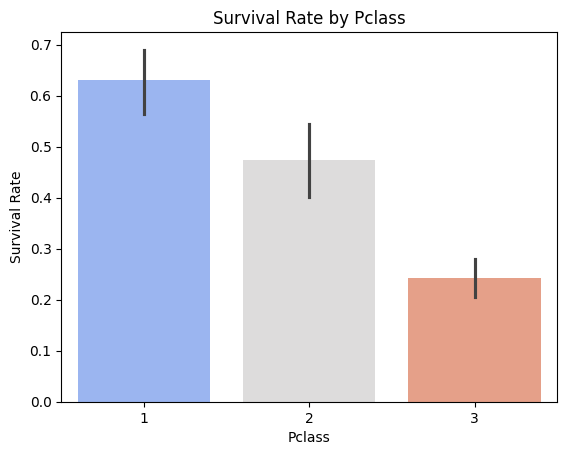

In [68]:
# survival rate by ticket class 

sns.barplot(x='Pclass', y='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.show()


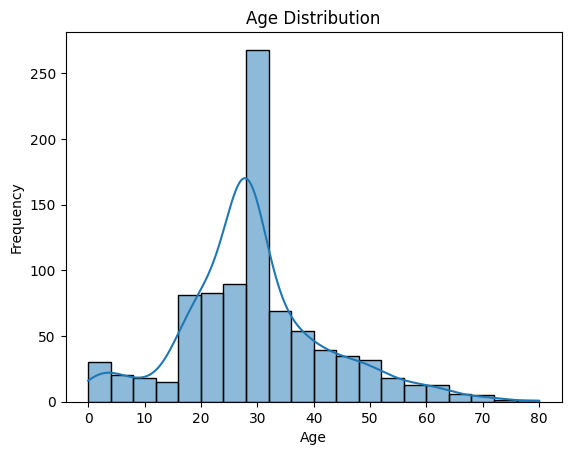

In [69]:
#Age distribution among the ship

sns.histplot(df['Age'], bins=20, kde=True, palette='viridis')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


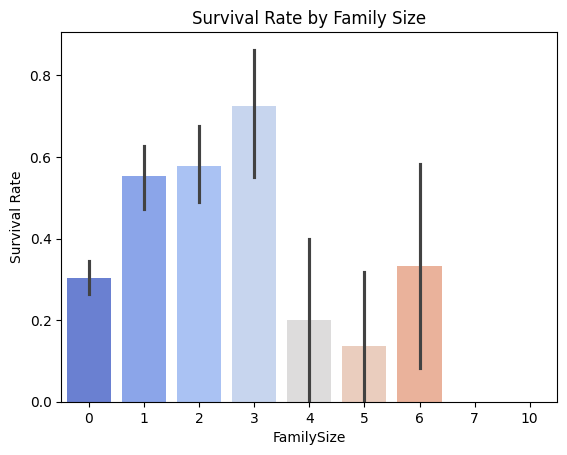

In [70]:
#Show how family size (siblings/spouses and parents/children) affects survival.

df['FamilySize'] = df['SibSp'] + df['Parch']
sns.barplot(x='FamilySize', y='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()


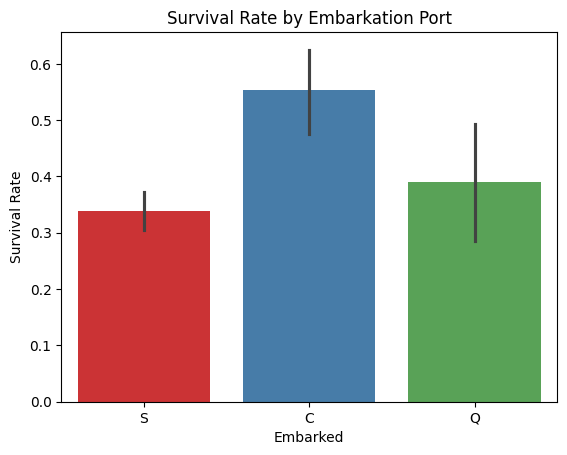

In [71]:
# Show survival rates across different embarkation points (C, Q, S).

sns.barplot(x='Embarked', y='Survived', data=df, palette='Set1')
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()


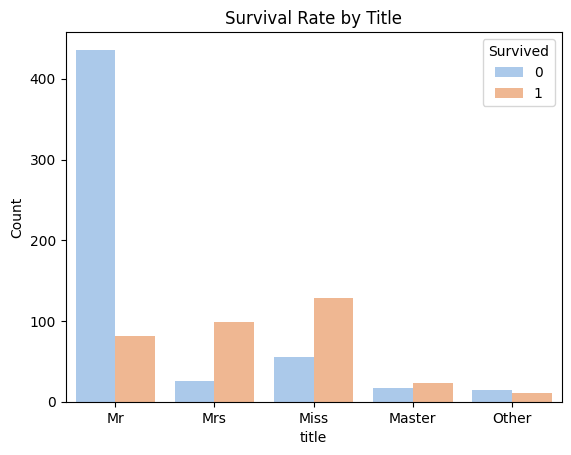

In [72]:
#Show the survival rate across different titles.

sns.countplot(x='title', hue='Survived', data=df, palette='pastel')
plt.title('Survival Rate by Title')
plt.ylabel('Count')
plt.show()


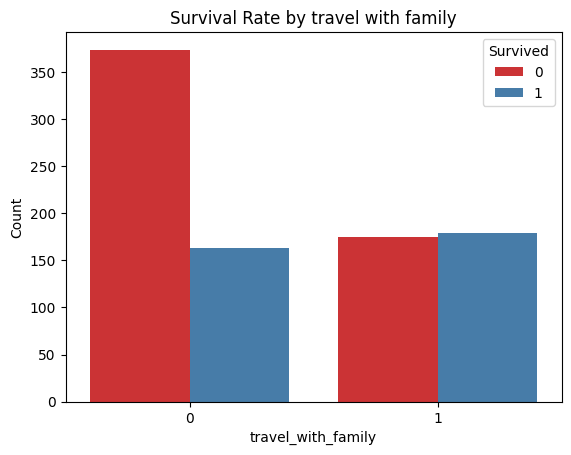

In [73]:
#Show the Survival Rate by travel with family.

sns.countplot(x='travel_with_family', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rate by travel with family')
plt.ylabel('Count')
plt.show()


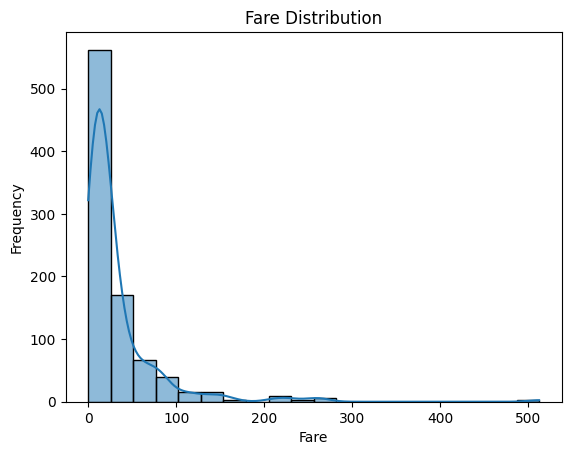

In [74]:
#  Show the distribution of fares.

sns.histplot(df['Fare'], bins=20, kde=True, palette='viridis')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


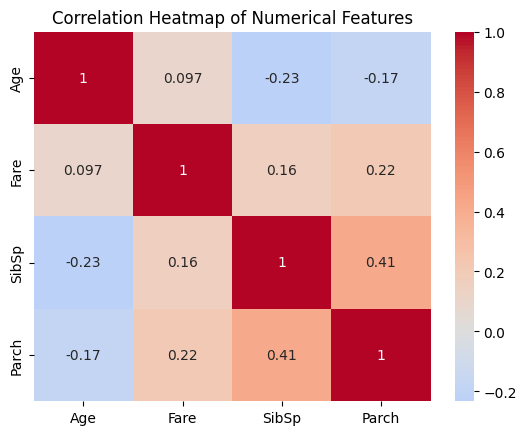

In [75]:
# how correlations between numerical features
corr = df[['Age', 'Fare', 'SibSp', 'Parch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


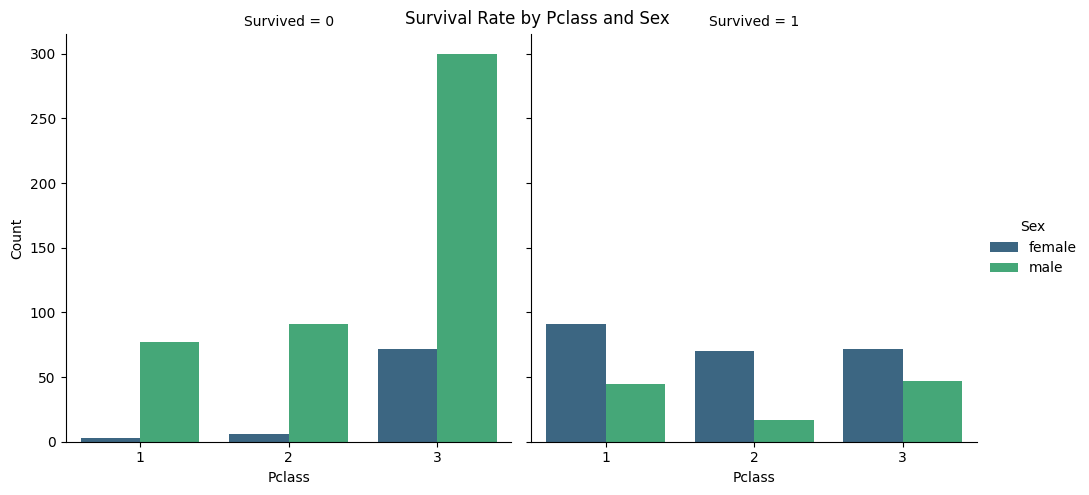

In [76]:
#Show survival rates by both class and gender

g = sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count', palette='viridis')
g.set_axis_labels('Pclass', 'Count')
g.fig.suptitle('Survival Rate by Pclass and Sex')
plt.show()


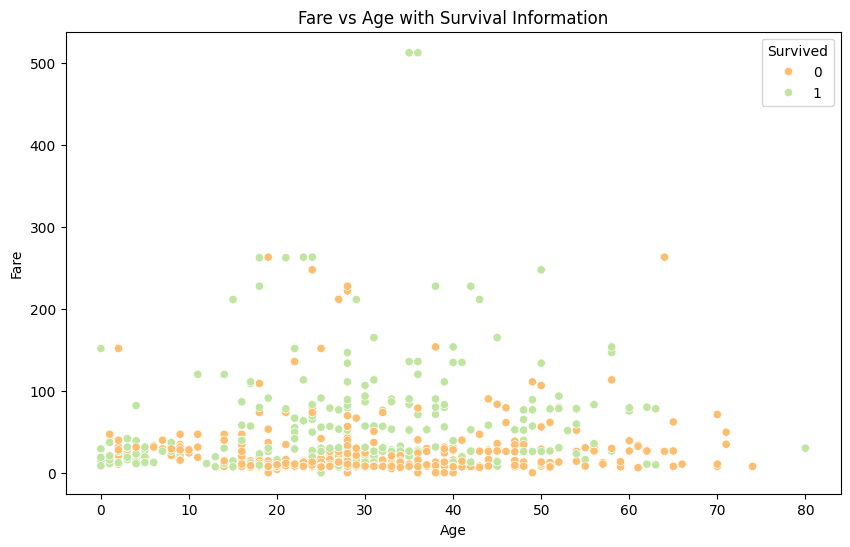

In [77]:
# Show the relationship between fare and age with survival indicated by color.

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='Spectral')
plt.title('Fare vs Age with Survival Information')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,travel_with_family,title,FamilySize
0,0,3,male,22,1,0,7.2500,S,1,Mr,1
1,1,1,female,38,1,0,71.2833,C,1,Mrs,1
2,1,3,female,26,0,0,7.9250,S,0,Miss,0
3,1,1,female,35,1,0,53.1000,S,1,Mrs,1
4,0,3,male,35,0,0,8.0500,S,0,Mr,0


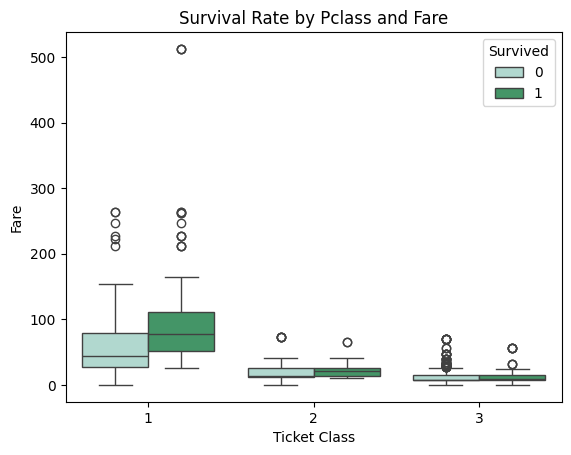

In [79]:
# passenger fare and survival rate for different ticket classes. This helps to analyze 
# how fare influences the likelihood of survival, especially within each class.

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='BuGn')
plt.title('Survival Rate by Pclass and Fare')
plt.xlabel('Ticket Class')
plt.ylabel('Fare')
plt.show()


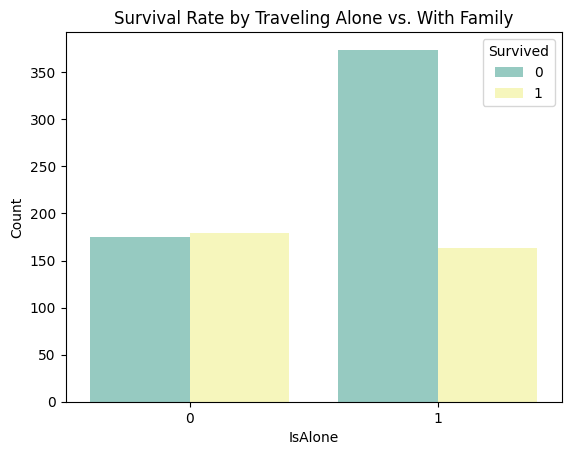

In [80]:
# . Survival Rate by Family vs. Alone

df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 0 else 0)
sns.countplot(x='IsAlone', hue='Survived', data=df, palette='Set3')
plt.title('Survival Rate by Traveling Alone vs. With Family')
plt.ylabel('Count')
plt.show()


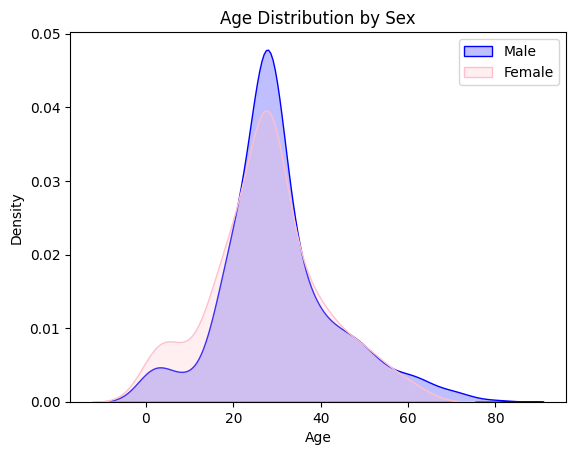

In [81]:
#  distribution of age for male and female passengers using a smooth estimate of the age distribution.

sns.kdeplot(df[df['Sex'] == 'male']['Age'], shade=True, color='blue', label='Male')
sns.kdeplot(df[df['Sex'] == 'female']['Age'], shade=True, color='pink', label='Female')
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


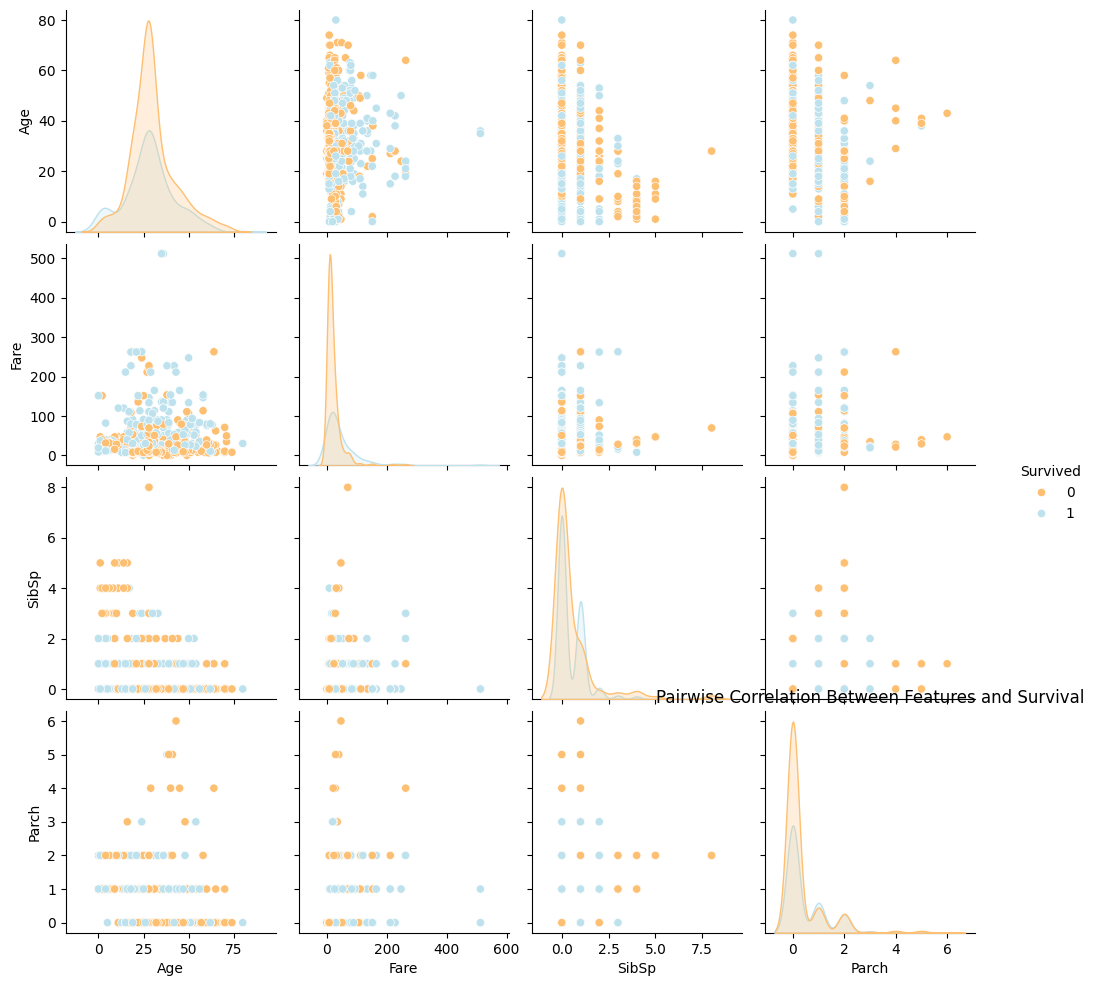

In [82]:
# relationships between numerical features and survival in a pairwise fashion

sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived', palette='RdYlBu')
plt.title('Pairwise Correlation Between Features and Survival')
plt.show()


### Lets check correlation of survival with features

In [ ]:
df['Sex'] = df['Sex'].apply(lambda x : 0 if x == 'male' else 1)


In [98]:
print(df['Survived'].corr(df['Age']) )
print(df['Survived'].corr(df['SibSp']))
print(df['Survived'].corr(df['Parch']))
print(df['Survived'].corr(df['Fare']))
print(df['Survived'].corr(df['travel_with_family']))
print(df['Survived'].corr(df['Sex']))
print(df['Survived'].corr(df['FamilySize']))


-0.06490893816693676
-0.03532249888573567
0.08162940708348382
0.25730652238496243
0.20336708569989184
0.5433513806577552
0.01663898928274517


### Outcomes 

- Sex shows the strongest correlation with survival, with females having a significantly higher chance of survival compared to males.

- Fare also shows a moderate positive correlation, which likely reflects socio-economic factors, such as passengers in higher classes being more likely to survive.

- The Travel with Family and Parch columns suggest that passengers with family or those traveling with children/parents were somewhat more likely to survive.